Here we test Grover's search in different variations.

{'010': 2504, '000': 2562, '001': 2461, '011': 2473}


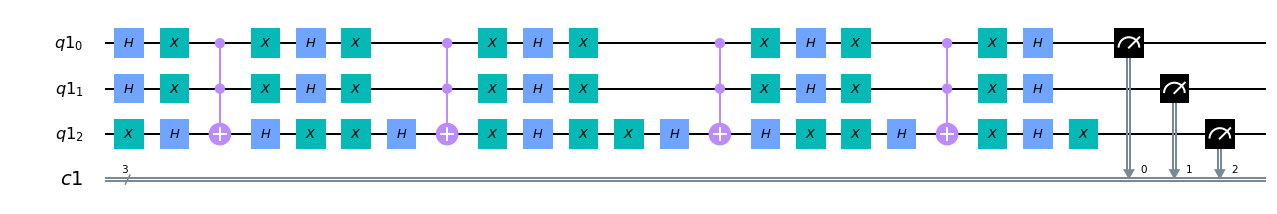

In [2]:
%run grover.py

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

qubit_count_for_search = 2

qreg =  QuantumRegister(qubit_count_for_search*2-1)
creg = ClassicalRegister(qubit_count_for_search*2-1)

mycircuit = QuantumCircuit(qreg,creg)

#number of iterations and list of marked elements
iteration_count = 2
elements = [0]

#grover(mycircuit,qreg,qubit_count_for_search,elements)
grover(mycircuit,qreg,qubit_count_for_search,elements,iteration_count)
#parametrized_grover(mycircuit,qreg,qubit_count_for_search,elements,iteration_count,pi/16,False)

mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(mycircuit)
print(counts)
mycircuit.draw(output='mpl')
#print(get_optimal_iteration_count(qubit_count_for_search, 4))

#mycircuit.draw(output='mpl')

Here we test Grover's search with unknown number of marked elements.

In [33]:
%run grover.py

qubit_count_for_search = 4
grover_unknown_count(qubit_count_for_search,[7,2])

Grover found element: 1 , assumed number of marked elements: 1
Grover found element: 7 , assumed number of marked elements: 2


Here we have unknown number of marked elements and Oracle defined as a function.

In [29]:
def oracle_f(x):
    values = [0,0,0,1,0,1,0,0]
    if(x < len(values) and x>=0):
        return values[x]
    else:
        return 0

%run grover.py

qubit_count_for_search = 3
grover_unknown_count(qubit_count_for_search,oracle_f,True)

Grover found element: 6 , assumed number of marked elements: 1
Grover found element: 3 , assumed number of marked elements: 2
